In [26]:
### This notebook process candidate expression and CERES score in 21Q2 DepMap data
# Author: Yiyun

import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

import seaborn as sns

In [10]:
### Read file
dir_depmap = './figure5/depmap'
gene = 'CALR'
lineage = 'Endometrial Adenocarcinoma'  ## Check lineage beforehead
# df_depmap[df_depmap['Lineage'] == 'Uterus']['Lineage Subtype'].unique()
df_depmap = pd.read_csv(os.path.join(dir_depmap, gene+'_21Q2.csv'))
df_depmap.columns = ['ID', 'CERES', 'Name', 'Primary Disease', 'Lineage', 'Lineage Subtype', 'Expression', 'Mutation']

In [23]:
df_gene = df_depmap[df_depmap['Lineage Subtype'] == lineage]
df_other = df_depmap[df_depmap['Lineage Subtype'] != lineage]
df_all = pd.DataFrame({'inlineage':df_gene['CERES'],
                      'other':df_other['CERES']})
df_all = df_all.melt()

Text(0.5, 1.0, 'Endometrial Adenocarcinoma_CALR_test statistic:6928.0,p-value:0.0145')

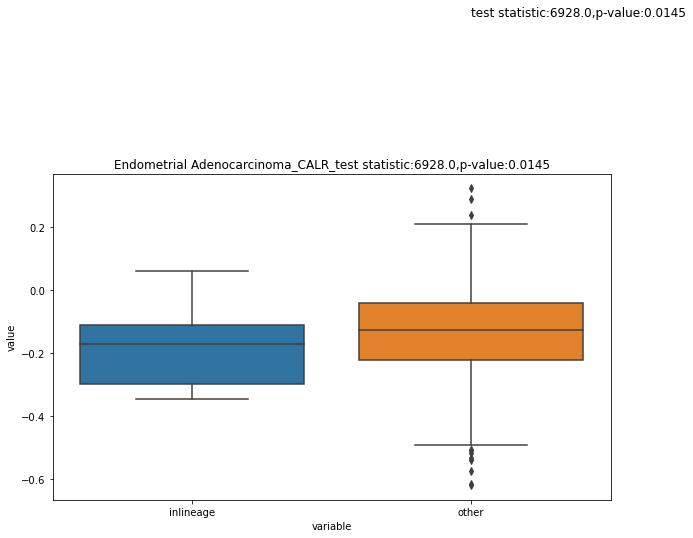

In [27]:
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(x = 'variable', y = 'value', data = df_all)

mannwhitneyu(df_gene['CERES'], df_other['CERES'])
text = f'test statistic:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[0],4)},\
p-value:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[1],4)}'
ax.text(1, 0.9, text, fontsize=12, va='top')
ax.set_title(lineage+'_'+gene+'_'+text)

**DepMap expression**

In [30]:
df_all_exp = pd.DataFrame({'inlineage':df_gene['Expression'],
                      'other':df_other['Expression']})
df_all_exp = df_all_exp.melt()

Text(0.5, 1.0, 'Endometrial Adenocarcinoma_CALR_test statistic:8261.5,p-value:0.1294')

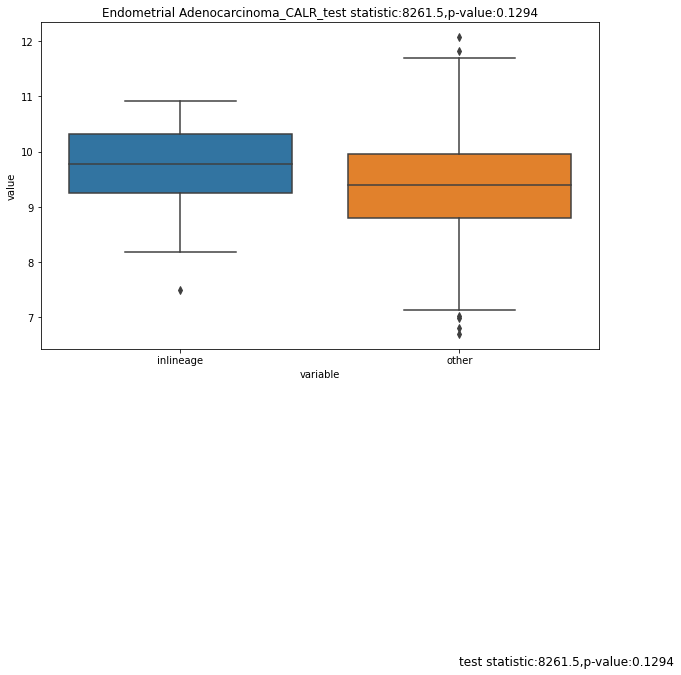

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(x = 'variable', y = 'value', data = df_all_exp)

mannwhitneyu(df_gene['Expression'], df_other['Expression'])
text = f'test statistic:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[0],4)},\
p-value:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[1],4)}'
ax.text(1, 0.9, text, fontsize=12, va='top')
ax.set_title(lineage+'_'+gene+'_'+text)